# Importing multiple libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas_profiling
from statistics import mode
plt.rcParams['figure.figsize'] = 10,7.5
plt.rcParams['axes.grid'] = True
plt.gray()

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# Data import and exploration 

In [3]:
credit_card = pd.read_excel(r'E:\Study\Analytix Labs\Projects\project\1. Predicting Credit Card Spend & Identifying Key Drivers\data set.xlsx')

In [4]:
credit_card.head(5)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [5]:
credit_card.columns

Index(['custid', 'region', 'townsize', 'gender', 'age', 'agecat', 'birthmonth',
       'ed', 'edcat', 'jobcat',
       ...
       'owncd', 'ownpda', 'ownpc', 'ownipod', 'owngame', 'ownfax', 'news',
       'response_01', 'response_02', 'response_03'],
      dtype='object', length=130)

In [6]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 130 entries, custid to response_03
dtypes: float64(31), int64(97), object(2)
memory usage: 5.0+ MB


In [7]:
credit_card.describe().T                                                       

,count,mean,std,min,25%,50%,75%,max
region,5000.0,3.001400,1.421760,1.000000,2.000000,3.000000,4.000000,5.000000
townsize,4998.0,2.687275,1.425925,1.000000,1.000000,3.000000,4.000000,5.000000
gender,5000.0,0.503600,0.500037,0.000000,0.000000,1.000000,1.000000,1.000000
age,5000.0,47.025600,17.770338,18.000000,31.000000,47.000000,62.000000,79.000000
agecat,5000.0,4.238800,1.308785,2.000000,3.000000,4.000000,5.000000,6.000000
ed,5000.0,14.543000,3.281083,6.000000,12.000000,14.000000,17.000000,23.000000
edcat,5000.0,2.672000,1.211738,1.000000,2.000000,2.000000,4.000000,5.000000
jobcat,5000.0,2.752800,1.737900,1.000000,1.000000,2.000000,4.000000,6.000000
union,5000.0,0.151200,0.358280,0.000000,0.000000,0.000000,0.000000,1.000000
employ,5000.0,9.730400,9.690929,0.000000,2.000000,7.000000,15.000000,52.000000


# Creating dependent variable.

In [8]:
credit_card['total_spend'] = credit_card.cardspent + credit_card.card2spent

In [9]:
credit_card.drop(columns = ['cardspent','card2spent'],inplace = True)

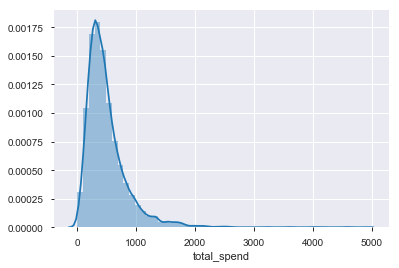

In [10]:
#testing normalization
sns.distplot(credit_card.total_spend)

In [11]:
print(credit_card.total_spend.mean())
print(credit_card.total_spend.median())


498.0786300000011
414.25


In [12]:
#to make y variable normal
credit_card['log_total_spend'] = np.log(credit_card.total_spend)


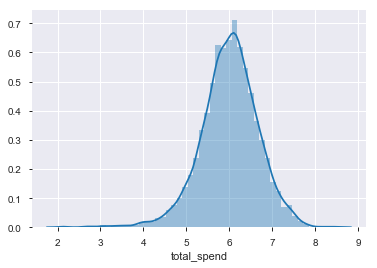

In [13]:
sns.distplot(np.log(credit_card.total_spend))
credit_card.drop(columns='total_spend',inplace=True)

In [14]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 129 entries, custid to log_total_spend
dtypes: float64(30), int64(97), object(2)
memory usage: 4.9+ MB


In [15]:
#list of name of categorical variables.
cat = ['region'
,'custid'
,'birthmonth'
,'townsize'
,'gender'
,'agecat'
,'edcat'
,'jobcat'
,'union'
,'employ'
,'empcat'
,'retire'
,'inccat'
,'default'
,'jobsat'
,'marital'
,'spousedcat'
,'homeown'
,'hometype'
,'address'
,'addresscat'
,'cars'
,'carown'
,'cartype'
,'carcatvalue'
,'carbought'
,'carbuy'
,'commute'
,'commutecat'
,'commutecar'
,'commutemotorcycle'
,'commutecarpool'
,'commutebus'
,'commuterail'
,'commutepublic'
,'commutebike'
,'commutewalk'
,'commutenonmotor'
,'telecommute'
,'reason'
,'polview'
,'polparty'
,'polcontrib'
,'vote'
,'card'
,'cardtype'
,'cardbenefit'
,'cardfee'
,'cardtenure'
,'cardtenurecat'
,'card2'
,'card2type'
,'card2benefit'
,'card2fee'
,'card2tenure'
,'card2tenurecat'
,'active'
,'bfast'
,'churn'
,'tollfree'
,'equip'
,'callcard'
,'wireless'
,'multline'
,'voice'
,'pager'
,'internet'
,'callid'
,'callwait'
,'forward'
,'confer'
,'ebill'
,'owntv'
,'ownvcr'
,'owndvd'
,'owncd'
,'ownpda'
,'ownpc'
,'ownipod'
,'owngame'
,'ownfax'
,'news'
,'response_01'
,'response_02'
,'response_03']


In [16]:
#cat_var = [key for key in dict(credit_card.dtypes) if dict(credit_card.dtypes)[key] in ['object']]
cat_credit_spend = credit_card[cat]

In [17]:
#num_credit_spend = credit_card._get_numeric_data()
cat_credit_spend.dtypes

region              int64
custid             object
birthmonth         object
townsize          float64
gender              int64
agecat              int64
edcat               int64
jobcat              int64
union               int64
employ              int64
empcat              int64
retire              int64
inccat              int64
default             int64
jobsat              int64
marital             int64
spousedcat          int64
homeown             int64
hometype            int64
address             int64
addresscat          int64
cars                int64
carown              int64
cartype             int64
carcatvalue         int64
carbought           int64
carbuy              int64
commute             int64
commutecat          int64
commutecar          int64
                   ...   
card2tenurecat      int64
active              int64
bfast               int64
churn               int64
tollfree            int64
equip               int64
callcard            int64
wireless    

In [18]:
num_credit_spend_col = credit_card.columns.difference(cat)
num_credit_spend = credit_card[num_credit_spend_col]

In [19]:
cat_credit_spend.head(5)

,region,custid,birthmonth,townsize,gender,agecat,edcat,jobcat,union,employ,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,3964-QJWTRG-NPN,September,2.0,1,2,3,1,1,0,...,0,0,0,1,1,0,0,0,1,0
1,5,0648-AIPJSP-UVM,May,5.0,0,2,4,2,0,0,...,1,1,1,1,1,1,1,0,0,0
2,3,5195-TLUDJE-HVO,June,4.0,1,6,2,2,0,16,...,1,0,0,0,0,0,1,0,0,0
3,4,4459-VLPQUH-3OL,May,3.0,0,2,3,2,0,0,...,1,0,1,1,1,0,1,1,0,0
4,2,8158-SMTQFB-CNO,July,2.0,0,3,3,2,0,1,...,1,0,1,0,1,0,0,0,1,0


In [20]:
num_credit_spend.head(5)

,age,cardmon,cardten,carvalue,commutetime,creddebt,debtinc,ed,equipmon,equipten,...,pets_reptiles,pets_saltfish,pets_small,reside,spoused,tenure,tollmon,tollten,wiremon,wireten
0,20,14.25,60.0,14.3,22.0,1.200909,11.1,15,29.50,126.1,...,0,0,0,3,-1,5,29.0,161.05,0.00,0.00
1,22,16.00,610.0,6.8,29.0,1.222020,18.6,17,54.85,1975.0,...,0,0,0,2,-1,39,0.0,0.00,45.65,1683.55
2,67,23.00,1410.0,18.8,24.0,0.928620,9.9,14,0.00,0.0,...,0,0,0,3,13,65,0.0,0.00,0.00,0.00
3,23,21.00,685.0,8.7,38.0,0.022800,5.7,16,0.00,0.0,...,0,0,0,5,18,36,0.0,0.00,0.00,0.00
4,26,17.25,360.0,10.6,32.0,0.214659,1.7,16,0.00,0.0,...,0,0,0,4,13,21,16.5,387.70,19.05,410.80


In [21]:
num_credit_spend.var().round(2)

age                    315.78
cardmon                225.23
cardten             850499.92
carvalue               450.78
commutetime             34.56
creddebt                11.67
debtinc                 40.96
ed                      10.77
equipmon               369.14
equipten            832146.47
hourstv                 26.68
income                3066.67
lncardmon                0.32
lncardten                1.37
lncreddebt               1.62
lnequipmon               0.08
lnequipten               1.44
lninc                    0.56
lnlongmon                0.60
lnlongten                2.72
lnothdebt                1.27
lntollmon                0.16
lntollten                1.49
lnwiremon                0.15
lnwireten                1.65
log_total_spend          0.45
longmon                163.16
longten             959011.00
othdebt                 29.11
pets                    11.66
pets_birds               0.24
pets_cats                0.74
pets_dogs                0.63
pets_fresh

# Outliers treatment and filling null values.

In [23]:
def outlier_capping(x, upper=0.99,lower=0.01):
    x = x.clip_upper(x.quantile(upper))
    x = x.clip_lower(x.quantile(lower))
    return x

In [24]:
num_credit_spend = num_credit_spend.apply(lambda x : outlier_capping(x,upper = 0.95,lower = 0.05))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: clip_upper(threshold) is deprecated, use clip(upper=threshold) instead
  
C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: clip_lower(threshold) is deprecated, use clip(lower=threshold) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
num_credit_spend.isnull().sum()

age                   0
cardmon               0
cardten               2
carvalue              0
commutetime           2
creddebt              0
debtinc               0
ed                    0
equipmon              0
equipten              0
hourstv               0
income                0
lncardmon          1419
lncardten          1422
lncreddebt            1
lnequipmon         3296
lnequipten         3296
lninc                 0
lnlongmon             0
lnlongten             3
lnothdebt             1
lntollmon          2622
lntollten          2622
lnwiremon          3656
lnwireten          3656
log_total_spend       0
longmon               0
longten               3
othdebt               0
pets                  0
pets_birds            0
pets_cats             0
pets_dogs             0
pets_freshfish        0
pets_reptiles         0
pets_saltfish         0
pets_small            0
reside                0
spoused               0
tenure                0
tollmon               0
tollten         

In [26]:
ln = [ln for ln in list(num_credit_spend.columns) if ln.startswith('ln')]
ln
num_credit_spend.drop(columns=ln,inplace = True)

In [27]:
num_credit_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
age                5000 non-null int64
cardmon            5000 non-null float64
cardten            4998 non-null float64
carvalue           5000 non-null float64
commutetime        4998 non-null float64
creddebt           5000 non-null float64
debtinc            5000 non-null float64
ed                 5000 non-null int64
equipmon           5000 non-null float64
equipten           5000 non-null float64
hourstv            5000 non-null int64
income             5000 non-null int64
log_total_spend    5000 non-null float64
longmon            5000 non-null float64
longten            4997 non-null float64
othdebt            5000 non-null float64
pets               5000 non-null int64
pets_birds         5000 non-null int64
pets_cats          5000 non-null int64
pets_dogs          5000 non-null int64
pets_freshfish     5000 non-null int64
pets_reptiles      5000 non-null int64
pets_saltfi

In [28]:
num_credit_spend = num_credit_spend.apply(lambda x : x.fillna(np.mean(x)))

In [29]:
num_credit_spend.isnull().sum()

age                0
cardmon            0
cardten            0
carvalue           0
commutetime        0
creddebt           0
debtinc            0
ed                 0
equipmon           0
equipten           0
hourstv            0
income             0
log_total_spend    0
longmon            0
longten            0
othdebt            0
pets               0
pets_birds         0
pets_cats          0
pets_dogs          0
pets_freshfish     0
pets_reptiles      0
pets_saltfish      0
pets_small         0
reside             0
spoused            0
tenure             0
tollmon            0
tollten            0
wiremon            0
wireten            0
dtype: int64

In [30]:
cat_credit_spend.isnull().sum().sum()

2

In [31]:
cat_credit_spend['townsize'] =cat_credit_spend.townsize.fillna(mode(cat_credit_spend.townsize))

C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [32]:
cat_credit_spend = cat_credit_spend.apply(lambda x: x.fillna(x.mode()))

In [33]:
cat_credit_spend.isnull().sum().sum()

0

In [34]:
cat_credit_spend.dtypes

region              int64
custid             object
birthmonth         object
townsize          float64
gender              int64
agecat              int64
edcat               int64
jobcat              int64
union               int64
employ              int64
empcat              int64
retire              int64
inccat              int64
default             int64
jobsat              int64
marital             int64
spousedcat          int64
homeown             int64
hometype            int64
address             int64
addresscat          int64
cars                int64
carown              int64
cartype             int64
carcatvalue         int64
carbought           int64
carbuy              int64
commute             int64
commutecat          int64
commutecar          int64
                   ...   
card2tenurecat      int64
active              int64
bfast               int64
churn               int64
tollfree            int64
equip               int64
callcard            int64
wireless    

In [35]:
cat_credit_spend.drop(columns = ['custid'],inplace = True)
#num_credit_spend.drop(columns = ['spoused'],inplace = True)
#,'employ','inccat','marital','address','carcatvalue', 'commutecat','commutecar','commutemotorcycle','polview'
#                                 ,'commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor',
#                                 'telecommute','cardtenure','card2tenure'

In [36]:
cat_credit_spend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 84 columns):
region               5000 non-null int64
birthmonth           5000 non-null object
townsize             5000 non-null float64
gender               5000 non-null int64
agecat               5000 non-null int64
edcat                5000 non-null int64
jobcat               5000 non-null int64
union                5000 non-null int64
employ               5000 non-null int64
empcat               5000 non-null int64
retire               5000 non-null int64
inccat               5000 non-null int64
default              5000 non-null int64
jobsat               5000 non-null int64
marital              5000 non-null int64
spousedcat           5000 non-null int64
homeown              5000 non-null int64
hometype             5000 non-null int64
address              5000 non-null int64
addresscat           5000 non-null int64
cars                 5000 non-null int64
carown               5000 non

# Creating dummies for categorical variables.

In [37]:
def create_dummies( a, colname ):
    col_dummies = pd.get_dummies(a[colname], prefix=colname, drop_first=True)
    a = pd.concat([a, col_dummies], axis=1)
    a.drop( colname, axis = 1, inplace = True )
    return a



In [38]:
for c_feature in cat_credit_spend.columns.difference(['townsize','jobsat']):
    cat_credit_spend = create_dummies(cat_credit_spend , c_feature)
    

In [39]:
cat_credit_spend.head()

,townsize,jobsat,active_1,address_1,address_2,address_3,address_4,address_5,address_6,address_7,...,spousedcat_2,spousedcat_3,spousedcat_4,spousedcat_5,telecommute_1,tollfree_1,union_1,voice_1,vote_1,wireless_1
0,2.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0
1,5.0,1,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
2,4.0,4,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,3.0,2,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1,1,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,1,0,1


In [40]:
cat_credit_spend= cat_credit_spend.astype('category')

In [41]:
#cat_credit_spend.dtypes

In [42]:
df = pd.concat([num_credit_spend,cat_credit_spend], axis = 1)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 381 entries, age to wireless_1
dtypes: category(350), float64(16), int64(15)
memory usage: 2.9 MB


In [44]:
y = df.log_total_spend
x= df[df.columns.difference(['log_total_spend'])]

In [45]:
y

0       5.007029
1       4.891146
2       5.886021
3       5.884464
4       6.230147
5       5.430529
6       6.859048
7       7.043288
8       6.148105
9       5.739182
10      6.698317
11      5.974903
12      6.596805
13      6.885959
14      5.609838
15      5.981717
16      5.996875
17      7.043288
18      6.374650
19      4.891146
20      6.239028
21      5.850045
22      5.732240
23      6.612149
24      6.549479
25      5.680548
26      6.307497
27      5.718671
28      5.710460
29      6.173515
          ...   
4970    5.820439
4971    5.161810
4972    4.891146
4973    5.276378
4974    6.172306
4975    6.868078
4976    5.318218
4977    5.772904
4978    4.891146
4979    5.710824
4980    5.703116
4981    4.891146
4982    5.914016
4983    6.101327
4984    6.354700
4985    6.246165
4986    5.627369
4987    6.043867
4988    5.962628
4989    5.332912
4990    6.375485
4991    5.742394
4992    7.033251
4993    5.834109
4994    6.082082
4995    7.043288
4996    5.903589
4997    7.0432

In [46]:
x.head()

,active_1,address_1,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,...,tollfree_1,tollmon,tollten,townsize,union_1,voice_1,vote_1,wireless_1,wiremon,wireten
0,0,0,0,0,0,0,0,0,0,0,...,1,29.0,161.05,2.0,1,1,1,0,0.00,0.00
1,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0.00,5.0,0,1,0,1,45.65,1683.55
2,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0.00,4.0,0,0,0,0,0.00,0.00
3,1,0,0,0,0,0,0,0,0,0,...,0,0.0,0.00,3.0,0,0,0,0,0.00,0.00
4,1,0,0,0,0,0,0,0,0,0,...,1,16.5,387.70,2.0,0,1,0,1,19.05,410.80


# Splitting data into Training and Testing

In [47]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,random_state=123,test_size=0.2)

In [48]:
X_train.head()

,active_1,address_1,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,...,tollfree_1,tollmon,tollten,townsize,union_1,voice_1,vote_1,wireless_1,wiremon,wireten
1863,0,0,0,0,0,0,0,0,0,0,...,1,24.75,453.90,3.0,1,0,0,0,0.0,0.0
420,1,0,0,0,0,0,0,0,0,0,...,0,0.00,0.00,4.0,0,0,1,0,0.0,0.0
3260,0,0,0,1,0,0,0,0,0,0,...,1,17.50,343.90,1.0,0,1,0,0,0.0,0.0
742,0,0,0,0,0,0,0,0,0,0,...,0,0.00,0.00,5.0,0,0,1,0,0.0,0.0
4809,0,0,0,0,0,0,0,0,0,0,...,1,18.25,1156.45,1.0,0,0,0,0,0.0,0.0


# Removing constant columns.

In [49]:
from sklearn.feature_selection import VarianceThreshold

In [50]:
feature = VarianceThreshold(threshold=0)
feature.fit(X_train)

VarianceThreshold(threshold=0)

In [51]:
X_train.head()

,active_1,address_1,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,...,tollfree_1,tollmon,tollten,townsize,union_1,voice_1,vote_1,wireless_1,wiremon,wireten
1863,0,0,0,0,0,0,0,0,0,0,...,1,24.75,453.90,3.0,1,0,0,0,0.0,0.0
420,1,0,0,0,0,0,0,0,0,0,...,0,0.00,0.00,4.0,0,0,1,0,0.0,0.0
3260,0,0,0,1,0,0,0,0,0,0,...,1,17.50,343.90,1.0,0,1,0,0,0.0,0.0
742,0,0,0,0,0,0,0,0,0,0,...,0,0.00,0.00,5.0,0,0,1,0,0.0,0.0
4809,0,0,0,0,0,0,0,0,0,0,...,1,18.25,1156.45,1.0,0,0,0,0,0.0,0.0


In [52]:
feature.get_support().sum()

376

In [53]:
features_to_keep = X_train.columns[feature.get_support()]

In [54]:
print(len([x for x in X_train.columns[~feature.get_support()]]))
a = X_train.loc[:,~feature.get_support()]
a.employ_41.unique()


4


[0]
Categories (1, uint64): [0]

In [55]:
X_train = feature.transform(X_train)
X_test = feature.transform(X_test)



In [56]:
feature.transform?

In [57]:
X_train = pd.DataFrame(X_train)
X_train.columns = features_to_keep
X_test = pd.DataFrame(X_test)
X_test.columns = features_to_keep



In [58]:
X_train.head()

,active_1,address_1,address_10,address_11,address_12,address_13,address_14,address_15,address_16,address_17,...,tollfree_1,tollmon,tollten,townsize,union_1,voice_1,vote_1,wireless_1,wiremon,wireten
0,0,0,0,0,0,0,0,0,0,0,...,1,24.75,453.9,3,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,4,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,1,17.5,343.9,1,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,5,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,18.25,1156.45,1,0,0,0,0,0,0


In [59]:
X_train.shape
X_test.shape

(1000, 376)

# removing quassi constant.

In [60]:
feature1 = VarianceThreshold(0.01)

In [61]:
feature1.fit(X_train)

VarianceThreshold(threshold=0.01)

In [62]:
feature1.get_support().sum()

323

In [63]:
feature1_to_keep = X_train.columns[feature1.get_support()]

In [64]:
X_train = feature1.transform(X_train)

In [65]:
X_test = feature1.transform(X_test)

In [66]:
X_train = pd.DataFrame(X_train)
X_train.columns = feature1_to_keep
X_test = pd.DataFrame(X_test)
X_test.columns = feature1_to_keep


In [67]:
X_train.shape , X_test.shape

((4000, 323), (1000, 323))

# removing duplicate features.

In [68]:
duplicated_feat = []
for i in range(0, len(X_train.columns)):
    if i % 10 == 0:  # this helps me understand how the loop is going
        print(i)
 
    col_1 = X_train.columns[i]
 
    for col_2 in X_train.columns[i + 1:]:
        if X_train[col_1].equals(X_train[col_2]):
            duplicated_feat.append(col_2)
            
len(duplicated_feat)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320


2

In [69]:
duplicated_feat
X_train.drop(labels=duplicated_feat, axis=1, inplace=True)
X_test.drop(labels=duplicated_feat, axis=1, inplace=True)

In [70]:
X_train_basic_filter = X_train.copy()
X_test_basic_filter = X_test.copy()

In [71]:
X_train = X_train.apply(lambda x: pd.to_numeric(x))
X_test = X_test.apply(lambda x: pd.to_numeric(x))

# removing correlated features

In [72]:
def correlation(dataset, threshold):

    col_corr = set()  # Set of all the names of correlated columns

    corr_matrix = dataset.corr()

    for i in range(len(corr_matrix.columns)):

        for j in range(i):

            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value

                colname = corr_matrix.columns[i]  # getting the name of column

                col_corr.add(colname)

    return col_corr

In [73]:
corr_features = correlation(X_train, 0.7)
print('correlated features: ', len(set(corr_features)) )

correlated features:  24


In [74]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

In [75]:
X_train.shape

(4000, 297)

# Univariate Variables

In [77]:
from sklearn.tree import DecisionTreeRegressor

In [78]:
rme_val = []
for feature in X_train.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].to_frame(), Y_train)
    Y_scored = clf.predict(X_test[feature].to_frame())
    rme_val.append(mean_absolute_error(Y_test, Y_scored))

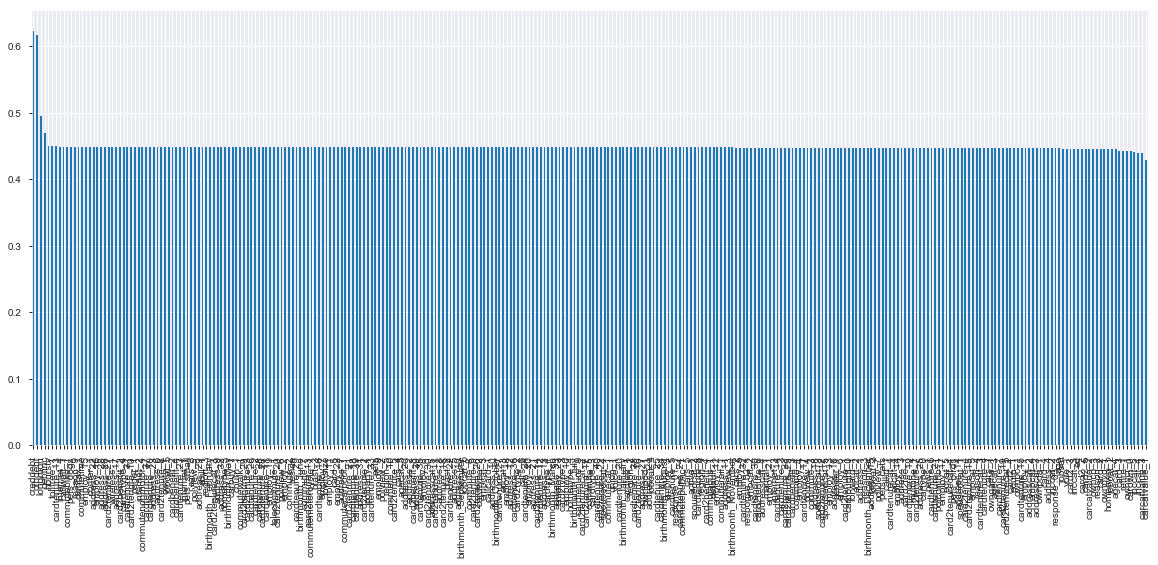

In [79]:
rme_val = pd.Series(rme_val)
rme_val.index = X_train.columns
rme_val.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [80]:
selected_feat = rme_val[rme_val < 0.45]
len(selected_feat)

293

In [81]:
selected_feat.index

Index(['active_1', 'address_1', 'address_10', 'address_11', 'address_12',
       'address_13', 'address_14', 'address_15', 'address_16', 'address_17',
       ...
       'spousedcat_3', 'spousedcat_4', 'spousedcat_5', 'telecommute_1',
       'tollfree_1', 'townsize', 'union_1', 'voice_1', 'vote_1', 'wireless_1'],
      dtype='object', length=293)

In [82]:
X_train = X_train[selected_feat.index]
X_test = X_test[selected_feat.index]

# Anova Testing

In [83]:
# Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(  X_train, Y_train )

In [84]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(X_train.columns, F_values,  ['%.3f' % p for p in p_values])]

In [85]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [86]:
f_reg_results.sort_values(by=['P_Value'])

,Variable,F_Value,P_Value
292,wireless_1,24.618512,0.000
251,ownpda_1,16.593615,0.000
280,retire_1,175.602673,0.000
252,owntv_1,32.098999,0.000
206,employ_17,16.952068,0.000
108,card_2,61.690799,0.000
253,ownvcr_1,92.109166,0.000
109,card_3,41.764240,0.000
160,carown_0,96.866880,0.000
110,card_4,23.969217,0.000


In [87]:
f_reg_results.P_Value = pd.to_numeric(f_reg_results.P_Value)

In [1]:
f_reg_results_new = f_reg_results[f_reg_results.P_Value<=0.2]

NameError: name 'f_reg_results' is not defined

In [89]:
f_reg_results_new

,Variable,F_Value,P_Value
1,address_1,10.340674,0.001
7,address_15,3.245977,0.072
9,address_17,3.933441,0.047
10,address_18,2.158330,0.142
12,address_2,2.886564,0.089
15,address_22,6.751830,0.009
16,address_23,2.712034,0.100
18,address_25,2.661852,0.103
21,address_28,4.354659,0.037
23,address_3,7.100533,0.008


In [90]:
f_reg_results_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128 entries, 1 to 292
Data columns (total 3 columns):
Variable    128 non-null object
F_Value     128 non-null float64
P_Value     128 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.0+ KB


In [91]:
list_vars = list(f_reg_results_new.Variable)

In [92]:
len(list_vars)

128

In [93]:
X_train = X_train[list_vars]
X_test = X_test[list_vars]

In [94]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 128 entries, address_1 to wireless_1
dtypes: int64(128)
memory usage: 3.9 MB


# VIF

In [95]:
all_columns = "+".join(list_vars)
my_formula = "log_total_spend~" + all_columns

print(my_formula)

log_total_spend~address_1+address_15+address_17+address_18+address_2+address_22+address_23+address_25+address_28+address_3+address_32+address_4+addresscat_2+addresscat_3+addresscat_4+agecat_4+agecat_5+bfast_2+bfast_3+birthmonth_February+callcard_1+callid_1+callwait_1+carbuy_1+carcatvalue_1+carcatvalue_2+carcatvalue_3+card2_2+card2_3+card2_4+card2_5+card2benefit_2+card2benefit_3+card2tenure_10+card2tenure_19+card2tenure_20+card2tenure_25+card2tenure_26+card2tenure_3+card2tenure_4+card2tenure_8+card2tenurecat_2+card2tenurecat_4+card2tenurecat_5+card_2+card_3+card_4+card_5+cardtenure_13+cardtenure_15+cardtenure_21+cardtenure_28+cardtenure_29+cardtenure_31+cardtenure_37+cardtenure_4+cardtenure_6+cardtenurecat_3+cardtenurecat_4+carown_0+cars_1+churn_1+commute_4+commutebike_1+commutenonmotor_1+confer_1+ebill_1+ed+edcat_2+edcat_3+edcat_4+edcat_5+empcat_2+empcat_4+empcat_5+employ_1+employ_13+employ_14+employ_16+employ_17+employ_19+employ_2+employ_4+equip_1+forward_1+gender_1+homeown_1+hometype

In [96]:
X_train['log_total_spend'] = Y_train

In [97]:
X = X_train

In [98]:
X.head()

,address_1,address_15,address_17,address_18,address_2,address_22,address_23,address_25,address_28,address_3,...,response_03_1,retire_1,spousedcat_1,spousedcat_3,spousedcat_4,tollfree_1,voice_1,vote_1,wireless_1,log_total_spend
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,5.007029
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,4.891146
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,1,0,0,5.886021
3,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,5.884464
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,NaN


In [99]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

# get y and X dataframes based on this regression
y_train, x_train = dmatrices(my_formula, X, return_type='dataframe')

# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif["features"] = x_train.columns

vif.round(1)

,VIF Factor,features
0,353.4,Intercept
1,1.4,address_1
2,1.2,address_15
3,1.3,address_17
4,1.3,address_18
5,1.4,address_2
6,1.2,address_22
7,1.2,address_23
8,1.2,address_25
9,1.1,address_28


In [100]:
X_train.drop(columns='log_total_spend',inplace=True)

In [101]:
X_train.head()

,address_1,address_15,address_17,address_18,address_2,address_22,address_23,address_25,address_28,address_3,...,response_02_1,response_03_1,retire_1,spousedcat_1,spousedcat_3,spousedcat_4,tollfree_1,voice_1,vote_1,wireless_1
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,1,1,0,0,0


In [102]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

In [103]:
scaler = StandardScaler()
scaler.fit(X_train)

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

# Lasso

In [104]:
sel_ = SelectFromModel(Lasso(alpha = 0.02))
sel_.fit(scaler.transform(X_train), Y_train)
 


C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


SelectFromModel(estimator=Lasso(alpha=0.02, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [105]:
sel_.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True,  True, False,  True, False, False, False, False,
       False,  True,  True, False, False, False, False, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False]

In [106]:
# remove features with zero coefficient from dataset
# and parse again as dataframe (output of sklearn is
# numpy array)
X_train_lasso = pd.DataFrame(sel_.transform(X_train))
X_test_lasso = pd.DataFrame(sel_.transform(X_test))
 
# add the columns name
X_train_lasso.columns = X_train.columns[(sel_.get_support())]
X_test_lasso.columns = X_train.columns[(sel_.get_support())]

In [1]:
len(X_train_lasso.columns)

NameError: name 'X_train_lasso' is not defined

# RFE

In [108]:
# Importing the packages for running RFE
from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression

import itertools

# Fitting a Linear Regression Model for running RFE
lm = LinearRegression()

# creating the RFE model and selecting 10 attributes
rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train_lasso, Y_train)

In [109]:
rfe.get_support()

array([False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,  True])

In [110]:
RFE_features=X_train_lasso.columns[rfe.get_support()]

In [111]:
X_train_lasso1 = X_train_lasso[RFE_features]
X_test_lasso1 = X_test_lasso[RFE_features]


In [112]:
X_train_lasso1.head()

,card2_2,card2_3,card2_4,card_2,card_3,card_4,card_5,employ_17,inccat_3,inccat_4,inccat_5,owncd_1,owndvd_1,reason_2,retire_1
0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0
1,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0
2,1,0,0,0,1,0,0,0,0,0,1,1,1,0,0
3,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
4,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0


# Model Creation

In [113]:
dt = DecisionTreeRegressor(random_state = 0)

In [114]:
dt.fit(X_train_lasso1, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [115]:
Y_pred = dt.predict(X_test_lasso1)

In [116]:
mean_absolute_error(Y_pred, Y_test)



0.3900477957564311

In [118]:
Y_train_pred = dt.predict(X_train_lasso1)

In [119]:
np.sqrt(mean_squared_error(Y_train_pred,Y_train))

0.4649944431228781

In [117]:
np.sqrt(mean_squared_error(Y_pred,Y_test))

0.48663181092050145

In [120]:
print(dir(dt))

['__abstractmethods__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_estimator_type', '_get_param_names', '_validate_X_predict', 'apply', 'class_weight', 'classes_', 'criterion', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'max_depth', 'max_features', 'max_features_', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_classes_', 'n_features_', 'n_outputs_', 'predict', 'presort', 'random_state', 'score', 'set_params', 'splitter', 'tree_']


In [121]:
dt.feature_importances_

array([0.04324345, 0.05929311, 0.04453821, 0.06685302, 0.10820319,
       0.06089333, 0.05469384, 0.02179605, 0.0904114 , 0.11647534,
       0.15279781, 0.02552135, 0.03680353, 0.06457528, 0.05390109])

In [122]:
X_train_lasso1.columns

Index(['card2_2', 'card2_3', 'card2_4', 'card_2', 'card_3', 'card_4', 'card_5',
       'employ_17', 'inccat_3', 'inccat_4', 'inccat_5', 'owncd_1', 'owndvd_1',
       'reason_2', 'retire_1'],
      dtype='object')

In [123]:
[(i,v) for i,v in zip(X_train_lasso1.columns,dt.feature_importances_.round(6))]

[('card2_2', 0.043243),
 ('card2_3', 0.059293),
 ('card2_4', 0.044538),
 ('card_2', 0.066853),
 ('card_3', 0.108203),
 ('card_4', 0.060893),
 ('card_5', 0.054694),
 ('employ_17', 0.021796),
 ('inccat_3', 0.090411),
 ('inccat_4', 0.116475),
 ('inccat_5', 0.152798),
 ('owncd_1', 0.025521),
 ('owndvd_1', 0.036804),
 ('reason_2', 0.064575),
 ('retire_1', 0.053901)]